## Confidence Intervals

When a sample is taken of a population, the sample proportion can be used to estimate the population proportion. Confidence intervals can be constructed that describe a range within which there is a specified degree of confidence (probability) that the value of the population proportion lies within the range.
* Increasing the required degree of confidence, the probability that the population proportion lies within the confidence interval, increases the size of the interval.
* Increasing the sample size decreases the size of the confidence interval.

The chart below allows you to explore the effect of altering the population proportion, the sample size and the confidence requirement on the size of confidence intervals for different samples.

<IPython.core.display.Javascript object>


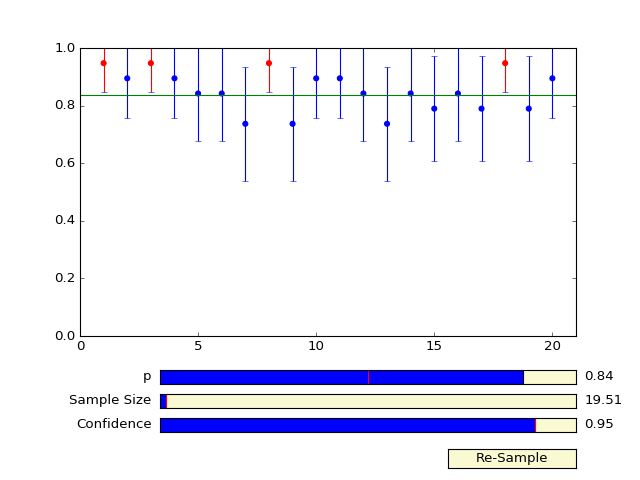

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np
import scipy.stats as st
import math
import random

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)


sample_size_0 = 20
conf_0 = 0.95 # confidence interval z score
p_0 = 0.5
number_of_samples = 20

# calculates the p_hat and sample confidence intervals
def sample_statistics(population_proportion, sample_size, confidence_interval, number_of_samples):

    p_hats = []
    errors = []
    z = st.norm.ppf(0.5 + confidence_interval / 2)
    for _dummy in range(number_of_samples):
        sample = [random.random() for _ in range(sample_size)]
        sample_count = sum([1 for x in sample if x < population_proportion])
        p_hat = float(sample_count) / sample_size
        p_hats.append( p_hat )
        errors.append( z * math.sqrt(p_hat * (1 - p_hat) / sample_size))
        
    return np.array(p_hats), np.array(errors)

def bar_colours(p, yerr_top, yerr_bot):
    in_range_colour = 'b'
    out_of_range_colour = 'r'
    cols = []
    for i in range(number_of_samples):
        if yerr_top[i] > p and yerr_bot[i] < p:
            cols.append(in_range_colour)
        else:
            cols.append(out_of_range_colour)
    
    return cols
    
p_hats, errors = sample_statistics(p_0, sample_size_0, conf_0, number_of_samples)

#plot sample confidence intervals
x = np.arange(1,number_of_samples+1) # x values for each sample

# color red if p is outside confidence interval
yerr_top = p_hats + errors
yerr_bot = p_hats - errors
cols = bar_colours(p_0, yerr_top, yerr_bot)
        
# plot p_hats and confidence intervals
plot_points = plt.scatter(x, p_hats, c=cols)
(_, (err_top, err_bot), (barsy)) = plt.errorbar(x, p_hats, yerr=errors, fmt="none", c=cols)

# plot a line as a reference for the population proportion
x = np.linspace(0,number_of_samples+1,number_of_samples+1)
y = [p_0 for _ in range(number_of_samples+1)]
p_line, = plt.plot(x,y)

#set the axis limits
plt.axis([0, number_of_samples+1, 0,1])

# set up interactivity interface
axcolor = 'lightgoldenrodyellow'
ax_p = plt.axes([0.25, 0.2, 0.65, 0.03], axisbg=axcolor)
ax_sample_size = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)
ax_conf = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
ax_resample_button = plt.axes([0.7, 0.025, 0.2, 0.04])
slider_p = Slider(ax_p, 'p', 0.05, 0.95, valinit=p_0)
slider_sample_size = Slider(ax_sample_size, 'Sample Size', 5, 1000, valinit=sample_size_0)
slider_conf = Slider(ax_conf, 'Confidence', 0.5, 0.999, valinit=conf_0)
button = Button(ax_resample_button, 'Re-Sample', color=axcolor, hovercolor='0.975')

# method for updating plot
def update(val):
    # read values off sliders
    p = slider_p.val
    conf = slider_conf.val
    sample_size = int(slider_sample_size.val)
    # generate new sample
    p_hats, errors = p_hats, errors = sample_statistics(p, sample_size, conf, number_of_samples)
    # calculate data used for updating plots
    x_base = np.arange(1,number_of_samples+1)
    yerr_top = p_hats + errors
    yerr_bot = p_hats - errors 
    cols = bar_colours(p, yerr_top, yerr_bot)

    #update error bars and points    
    err_top.set_ydata(yerr_top)
    err_bot.set_ydata(yerr_bot)
    new_segments_y = [np.array([[x, yt], [x,yb]]) for x, yt, yb in zip(x_base, yerr_top, yerr_bot)]
    barsy[0].set_segments(new_segments_y)
    plot_points.set_offsets(np.transpose( (x_base,p_hats)))
    plot_points.set_color(cols)
    barsy[0].set_color(cols)
    #update p_line
    y = [p for _ in range(number_of_samples+1)]
    p_line.set_ydata(y)
    fig.canvas.draw()

slider_p.on_changed(update)
slider_sample_size.on_changed(update)
slider_conf.on_changed(update)
button.on_clicked(update)

plt.show()